In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [11]:
with open("data_augmentation_GSE174188_SLE.csv", 'r') as file:
    df = pd.read_csv(file, index_col = 0)

age = df["age"].astype(int)
#df = df.drop(columns = ["mean_DC","std_NK", "std_CD4T", "std_CD8T", "std_B", "std_Monocyte", "std_DC"], axis = 1 )
df = df.drop(columns = "age", axis = 1)

In [12]:
def XGBR(df, age, test_size=0.3, n_estimators=65, max_depth=4, colsample_bytree = 1, gamma = 0.1, min_child_weight = 1, subsample = 0.8):
    X_train, X_test, y_train, y_test = train_test_split(df, age, test_size=test_size, random_state=42)
    # n_jobs=-1處理器全開
    xgbrModel = xgb.XGBRegressor(n_estimators = n_estimators, n_jobs=-1, max_depth = max_depth,
                                 colsample_bytree = colsample_bytree, gamma = gamma, min_child_weight = min_child_weight,
                                subsample = subsample, eval_metric="rmse")  
    # 創建k折交叉驗證對象
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # 進行 k-fold cross-validation，例如 k=10
    scores = cross_val_score(xgbrModel, df, age, cv=kf)
    print('Cross-validation scores: ', scores)

    # train model with early stopping
    eval_set = [(X_test, y_test)]
    xgbrModel.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    y_pred = xgbrModel.predict(X_test)

    # 計算均方誤差（Mean Squared Error, MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # 計算平均絕對誤差（Mean Absolute Error, MAE）
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    # 預測成功的比例
    print('Train Set score: ',xgbrModel.score(X_train,y_train))
    print('Test Set score: ',xgbrModel.score(X_test,y_test))
    # 計算皮爾森相關係數
    corr, _ = pearsonr(y_test, y_pred)
    print(f'Pearson correlation: {corr}')
    plt.scatter(y_test, y_pred, s=10, label='True')
    plt.xlabel('Actual Ages')
    plt.ylabel('Predicted Ages')
    plt.title('Actual vs Predicted Ages')
    plt.show()


    print('特徵重要程度: ',xgbrModel.feature_importances_)
    
def RandomForestRegression(X, y, test_size=0.3, n_estimators=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)#, random_state=0)
    # n_jobs=-1處理器全開
    RFR = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)# , random_state=0
    # 創建k折交叉驗證對象
    kf = KFold(n_splits=10, shuffle=True)
    # 進行 k-fold cross-validation，例如 k=10
    scores = cross_val_score(RFR, X, y, cv=kf)
    print('Cross-validation scores: ', scores)

    # train model
    RFR.fit(X_train, y_train)

    y_pred = RFR.predict(X_test)

    # 計算均方誤差（Mean Squared Error, MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # 計算平均絕對誤差（Mean Absolute Error, MAE）
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    # 預測成功的比例
    print('Train Set score: ',RFR.score(X_train,y_train))
    print('Test Set score: ',RFR.score(X_test,y_test))

    # 計算皮爾森相關係數
    corr, _ = pearsonr(y_test, y_pred)
    print(f'Pearson correlation: {corr}')

    plt.scatter(y_test, y_pred, s=10, label='True')
    plt.xlabel('Actual Ages')
    plt.ylabel('Predicted Ages')
    plt.title('Actual vs Predicted Ages')
    plt.show()
    
    
    print('特徵重要程度: ',RFR.feature_importances_)
    #print('樹的深度: ',RFR.get_depth)

Cross-validation scores:  [0.67900197 0.76605387 0.72411861 0.72048326 0.79507963 0.75399787
 0.77147713 0.68487256 0.74389921 0.75053268]
Mean Squared Error (MSE): 52.1143857969098
Mean Absolute Error (MAE): 5.7856118943956165
Train Set score:  0.8680332395142618
Test Set score:  0.7257458020997402
Pearson correlation: 0.8599727118762427


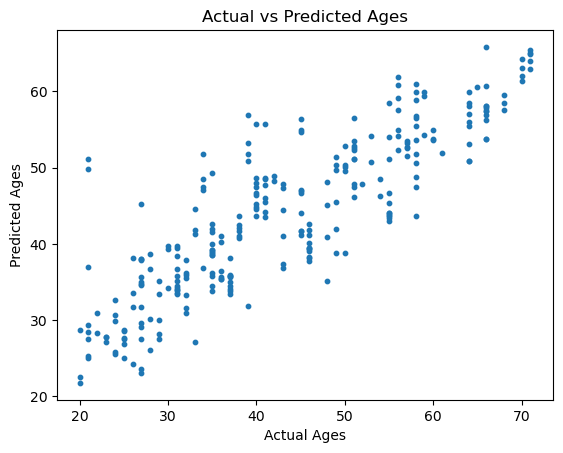

特徵重要程度:  [0.17127974 0.0821368  0.12211632 0.08363441 0.11657751 0.0768545
 0.15798755 0.03449257 0.04738408 0.         0.04732464 0.06021179]


In [15]:
XGBR(df, age, test_size=0.3, n_estimators=65, max_depth=2, colsample_bytree = 1, gamma = 0.1, min_child_weight = 1, subsample = 0.8)

Cross-validation scores:  [0.67900197 0.76605387 0.72411861 0.72048326 0.79507963 0.75399787
 0.77147713 0.68487256 0.74389921 0.75053268]
Mean Squared Error (MSE): 59.632654269475076
Mean Absolute Error (MAE): 6.127129325729972
Train Set score:  0.8540841937277904
Test Set score:  0.7221358304925432
Pearson correlation: 0.8667424971444015


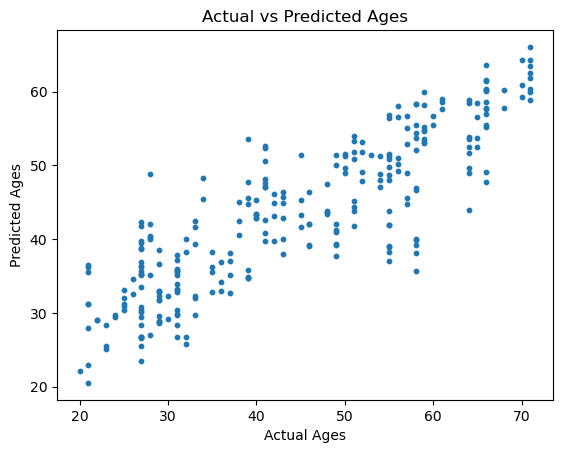

特徵重要程度:  [0.18110898 0.13432251 0.12038525 0.05497343 0.10129289 0.10520321
 0.04433683 0.04133263 0.08844621 0.06932365 0.03067022 0.02860413]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, age, test_size=0.3)
# n_jobs=-1處理器全開
xgbrModel = xgb.XGBRegressor(n_estimators = 65, n_jobs=-1, max_depth = 2,
                            colsample_bytree = 1, gamma = 0.1, min_child_weight = 1,
                            subsample = 0.8, eval_metric="rmse")  
# 創建k折交叉驗證對象
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 進行 k-fold cross-validation，例如 k=10
scores = cross_val_score(xgbrModel, df, age, cv=kf)
print('Cross-validation scores: ', scores)

# train model with early stopping
eval_set = [(X_test, y_test)]
xgbrModel.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xgbrModel.predict(X_test)

# 計算均方誤差（Mean Squared Error, MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# 計算平均絕對誤差（Mean Absolute Error, MAE）
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 預測成功的比例
print('Train Set score: ',xgbrModel.score(X_train,y_train))
print('Test Set score: ',xgbrModel.score(X_test,y_test))
# 計算皮爾森相關係數
corr, _ = pearsonr(y_test, y_pred)
print(f'Pearson correlation: {corr}')
plt.scatter(y_test, y_pred, s=10, label='True')
plt.xlabel('Actual Ages')
plt.ylabel('Predicted Ages')
plt.title('Actual vs Predicted Ages')
plt.show()


print('特徵重要程度: ',xgbrModel.feature_importances_)

Cross-validation scores:  [0.95218645 0.90123246 0.91338804 0.92001814 0.94699768 0.97874438
 0.94222026 0.94872843 0.92965979 0.96754987]
Mean Squared Error (MSE): 23.683548387096774
Mean Absolute Error (MAE): 3.210394265232975
Train Set score:  0.9794459097488184
Test Set score:  0.8833502050600374
Pearson correlation: 0.9456620051496627


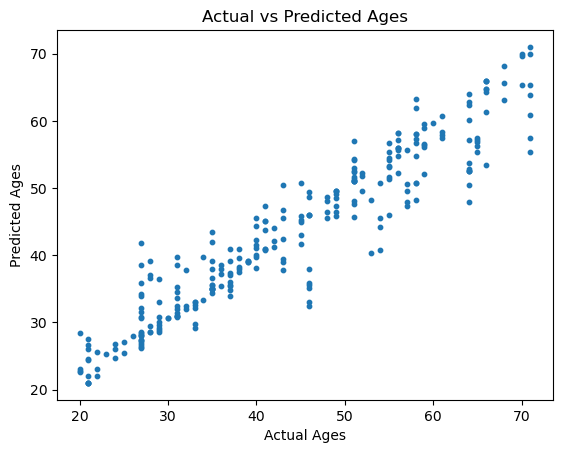

特徵重要程度:  [0.16202471 0.1457308  0.21971894 0.06115869 0.20350858 0.14164496
 0.01587379 0.00838068 0.00903015 0.01359317 0.01604278 0.00329274]


In [17]:
RandomForestRegression(df, age, test_size=0.3, n_estimators=10)